<a href="https://colab.research.google.com/github/Esther-dev923/projet-anna/blob/main/analyse_netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Aperçu des données :


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...



Informations générales :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB

Valeurs manquantes par colonne :
show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
dur

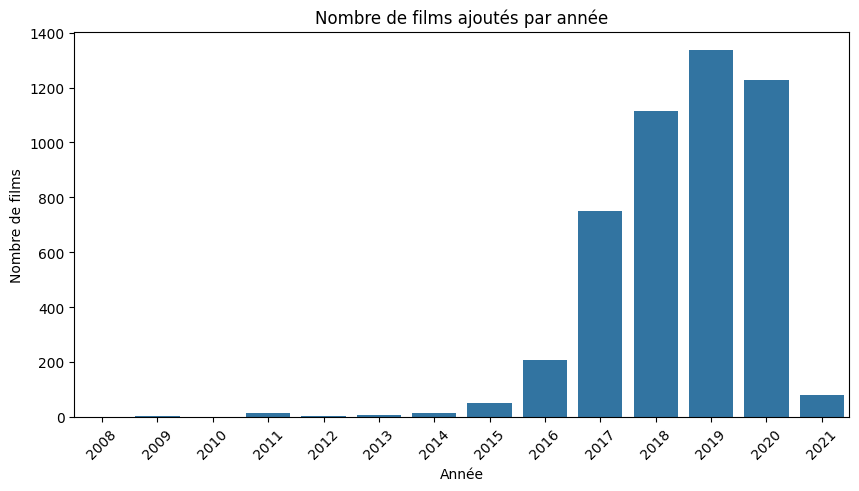

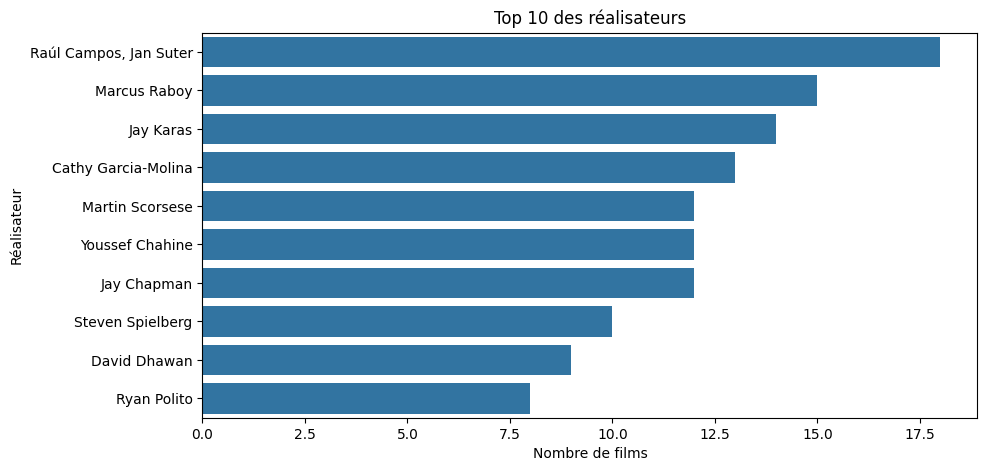

In [3]:
# 1️⃣ Importation des bibliothèques
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# 2️⃣ Chargement du dataset depuis un lien direct
url = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-04-20/netflix_titles.csv"
df = pd.read_csv(url)


# 3️⃣ Aperçu des données
print("Aperçu des données :")
display(df.head())

# 4️⃣ Informations générales
print("\nInformations générales :")
df.info()

# 5️⃣ Valeurs manquantes
print("\nValeurs manquantes par colonne :")
print(df.isnull().sum())

# 6️⃣ Nettoyage des données
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')  # conversion en date
df.dropna(inplace=True)  # suppression des lignes vides

# 7️⃣ Création d'une colonne année
df['year_added'] = df['date_added'].dt.year

# 8️⃣ Analyse rapide - Top 5 genres
print("\nTop 5 des genres les plus fréquents :")
print(df['listed_in'].value_counts().head(5))

# 9️⃣ Graphique - Nombre de films ajoutés par année
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="year_added", order=sorted(df["year_added"].unique()))
plt.title("Nombre de films ajoutés par année")
plt.xlabel("Année")
plt.ylabel("Nombre de films")
plt.xticks(rotation=45)
plt.show()

# 🔟 Graphique interactif avec Plotly
fig = px.histogram(df, x="year_added", title="Histogramme interactif par année")
fig.show()

# 1️⃣1️⃣ Top 10 des réalisateurs les plus présents
top_directors = df['director'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_directors.values, y=top_directors.index)
plt.title("Top 10 des réalisateurs")
plt.xlabel("Nombre de films")
plt.ylabel("Réalisateur")
plt.show()

# 1️⃣2️⃣ Graphique interactif Films vs Séries
fig = px.histogram(df, x="type", title="Répartition Films vs Séries")
fig.show()
